<a href="https://colab.research.google.com/github/nadaz10/BinaryClassificcation/blob/main/CSE459_Deep_Learning_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Deep Learning Lab 2**

Today, you will know how to solve binary, multi-class, and multi-label problems with neural networks.

All of this by solving problems like detecting fake dollar bills, deciding who threw which dart at a board, and building an intelligent system to water your farm. You will also be able to plot model training metrics and to stop training and save your models when they no longer improve.



**I. Binary Classifiation**


You will practice building classification models in Keras with the Banknote Authentication dataset.

Your goal is to distinguish between real and fake dollar bills. In order to do this, the dataset comes with 4 features: variance,skewness,curtosis and entropy. These features are calculated by applying mathematical operations over the dollar bill images.

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from google.colab import files


plt.rcParams['figure.figsize'] = (8, 8)

**1- Upload the Dataset**

In [ ]:
# Upload the file from your local system
uploaded = files.upload()

# Assuming you've uploaded 'cardio_train.xlsx', read it into a pandas DataFrame
file_name = "banknotes.csv"  # Make sure this matches the name of the file you uploaded
data = pd.read_csv(file_name)

# Print the original data to verify it's loaded correctly
print("Original Data:")
print(data.head())

Saving banknotes.csv to banknotes.csv
Original Data:
   variace  skewness  curtosis  entropy  class
0  3.62160    8.6661   -2.8073 -0.44699      0
1  4.54590    8.1674   -2.4586 -1.46210      0
2  3.86600   -2.6383    1.9242  0.10645      0
3  3.45660    9.5228   -4.0112 -3.59440      0
4  0.32924   -4.4552    4.5718 -0.98880      0


II. Data Preprocessing

In [ ]:
# Normlize the data
X = data.iloc[:, :4]
X = ((X - X.mean()) / X.std()).to_numpy()
y = data['class'].to_numpy()

III. Data Visalization

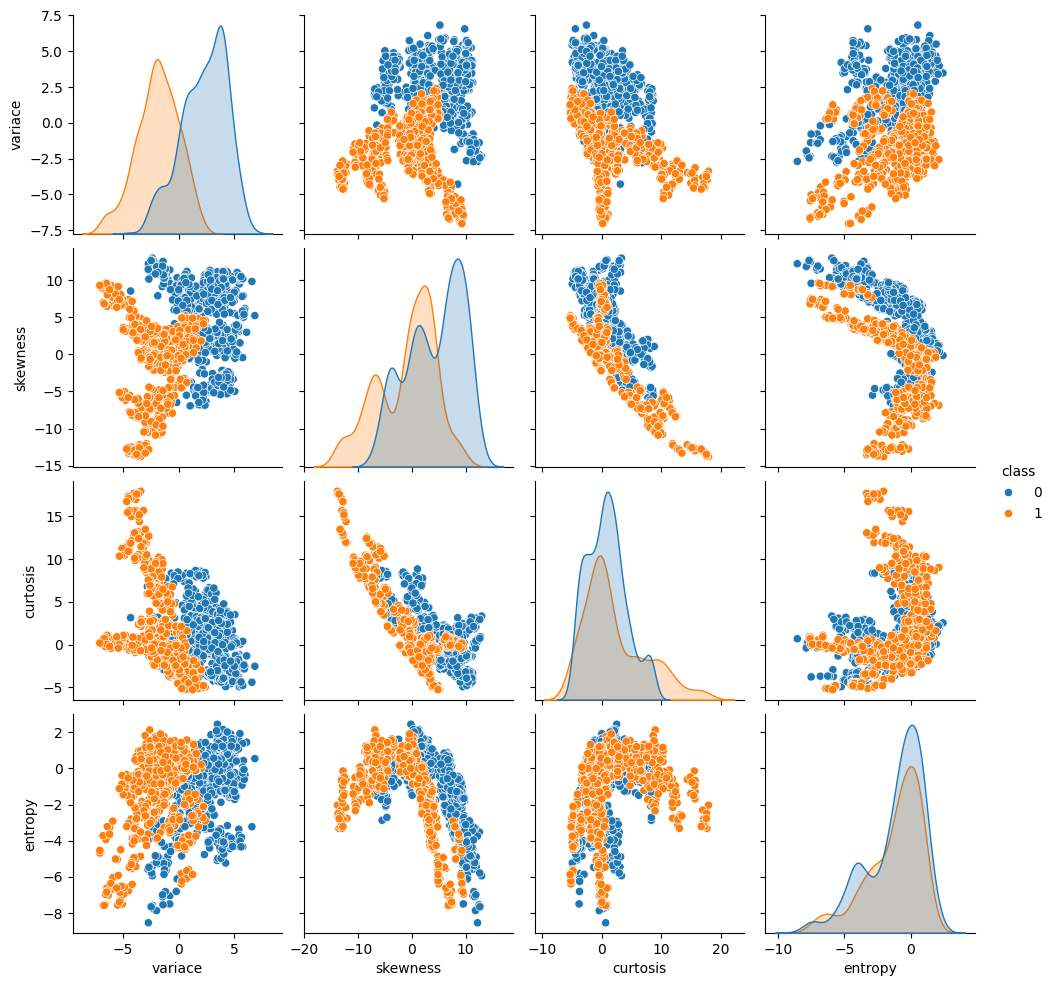

In [ ]:
# Use pairplot and set the hue to be our class column
sns.pairplot(data, hue='class');

IV. Basic Data Analysis

In [ ]:
# Describe the data
print('Dataset stats: \n', data.describe())

# Count the number of observations per class
print('Observations per class: \n', data['class'].value_counts())

Dataset stats: 
            variace     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000
Observations per class: 
 0    762
1    610
Name: class, dtype: int64


VI. Model Building

How many inputs? Why sigmoid? Why SGD? Why Binary Corss Entropy?

In [ ]:
# Create a sequential model
model = Sequential()

# Add a dense layer
model.add(Dense(1, input_shape=(4, ), activation='sigmoid'))

# Compile your model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Display a summary of your model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


VI.I Spreading Data Into Test and Train

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

VII. Model Training

In [ ]:
# Train your model for 20 epochs
model.fit(X_train, y_train, epochs=20)

# Evaluate your model accuracy on the test set
accuracy = model.evaluate(X_test, y_test)[1]

# Print accuracy
print('Accuracy: ', accuracy)

Epoch 1/20
33/33 [==============================] - 1s 2ms/step - loss: 0.5750 - accuracy: 0.6978
Epoch 2/20
33/33 [==============================] - 0s 2ms/step - loss: 0.5534 - accuracy: 0.7075
Epoch 3/20
33/33 [==============================] - 0s 1ms/step - loss: 0.5347 - accuracy: 0.7221
Epoch 4/20
33/33 [==============================] - 0s 1ms/step - loss: 0.5177 - accuracy: 0.7376
Epoch 5/20
33/33 [==============================] - 0s 2ms/step - loss: 0.5020 - accuracy: 0.7502
Epoch 6/20
33/33 [==============================] - 0s 2ms/step - loss: 0.4881 - accuracy: 0.7609
Epoch 7/20
33/33 [==============================] - 0s 2ms/step - loss: 0.4752 - accuracy: 0.7638
Epoch 8/20
33/33 [==============================] - 0s 2ms/step - loss: 0.4632 - accuracy: 0.7784
Epoch 9/20
33/33 [==============================] - 0s 2ms/step - loss: 0.4520 - accuracy: 0.7852
Epoch 10/20
33/33 [==============================] - 0s 2ms/step - loss: 0.4415 - accuracy: 0.7959
Epoch 11/20
33/33 [

Can we achieve a better accuracy?

-Then, we will be using Keras Call Backs as Early Stopping

The early stopping callback is useful since it allows for you to stop the model training if it no longer improves after a given number of epochs. To make use of this functionality you need to pass the callback inside a list to the model's callback parameter in the .fit() method.

The model you built to detect fake dollar bills is loaded for you to train, this time with early stopping. X_train, y_train, X_test and y_test are also available for you to use.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define a callback to monitor val_acc
monitor_val_acc = EarlyStopping(monitor='val_accuracy', patience=20)

# Train your model using early stopping callback
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test),
          callbacks=[monitor_val_acc]);

Epoch 1/100
33/33 [==============================] - 0s 5ms/step - loss: 0.2070 - accuracy: 0.9368 - val_loss: 0.2209 - val_accuracy: 0.9184
Epoch 2/100
33/33 [==============================] - 0s 3ms/step - loss: 0.2050 - accuracy: 0.9378 - val_loss: 0.2189 - val_accuracy: 0.9184
Epoch 3/100
33/33 [==============================] - 0s 3ms/step - loss: 0.2031 - accuracy: 0.9397 - val_loss: 0.2169 - val_accuracy: 0.9184
Epoch 4/100
33/33 [==============================] - 0s 3ms/step - loss: 0.2012 - accuracy: 0.9417 - val_loss: 0.2150 - val_accuracy: 0.9242
Epoch 5/100
33/33 [==============================] - 0s 3ms/step - loss: 0.1993 - accuracy: 0.9427 - val_loss: 0.2131 - val_accuracy: 0.9271
Epoch 6/100
33/33 [==============================] - 0s 3ms/step - loss: 0.1976 - accuracy: 0.9446 - val_loss: 0.2111 - val_accuracy: 0.9300
Epoch 7/100
33/33 [==============================] - 0s 3ms/step - loss: 0.1958 - accuracy: 0.9466 - val_loss: 0.2094 - val_accuracy: 0.9300
Epoch 8/100
3

**Multi Class Classification**

You're going to build a model that predicts who threw which dart only based on where that dart landed! (That is the dart's x and y coordinates on the board.)

This problem is a multi-class classification problem since each dart can only be thrown by one of 4 competitors. So classes/labels are mutually exclusive, and therefore we can build a neuron with as many output as competitors and use the softmax activation function to achieve a total sum of probabilities of 1 over all competitors.

I. Upload the Dataset

In [ ]:
# Upload the file from your local system
uploaded = files.upload()

# Assuming you've uploaded 'cardio_train.xlsx', read it into a pandas DataFrame
file_name = "darts.csv"  # Make sure this matches the name of the file you uploaded
data = pd.read_csv(file_name)

# Print the original data to verify it's loaded correctly
print("Original Data:")
print(data.head())

Saving darts.csv to darts.csv
Original Data:
     xCoord    yCoord competitor
0  0.196451 -0.520341      Steve
1  0.476027 -0.306763      Susan
2  0.003175 -0.980736    Michael
3  0.294078  0.267566       Kate
4 -0.051120  0.598946      Steve


II. Data Visalization

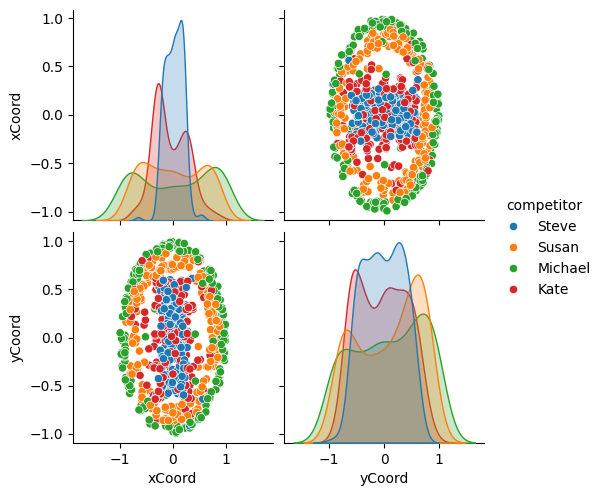

In [ ]:
sns.pairplot(data, hue='competitor');

III. Model Building


Why ReLU? Why Softmax? Why Categorical Cross Entropy? Why Adam?



In [ ]:
# Instantiate a sequential model
model = Sequential()

# Add 3 dense layers of 128, 64, 32, neurons each
model.add(Dense(128, input_shape=(2, ), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Add a dense layer with as many neurons as competitors
model.add(Dense(4, activation='softmax'))

# Compile your model using categorical_crossentropy loss
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

VI. Dataset Encoding

In the console you can check that your labels, `darts.competitor` are not yet in a format to be understood by your network. They contain the names of the competitors as strings. You will first turn these competitors into unique numbers,then use the `to_categorical()` function from `tf.keras.utils` to turn these numbers into their one-hot encoded representation.

This is useful for multi-class classification problems, since there are as many output neurons as classes and for every observation in our dataset we just want one of the neurons to be activated.

After this step, each competitor is now a vector of length 4, full of zeroes except for the!

In [ ]:
from tensorflow.keras.utils import to_categorical

# Transform into a categorical variable
data.competitor = pd.Categorical(data.competitor)

# Assign a number to each category (label encoding)
data.competitor = data.competitor.cat.codes

# Print the label encoded competitors
print('Label encoded competitors: \n', data.competitor.head())

coordinates = data.drop(['competitor'], axis=1)

# Use to_categorical on your labels
competitors = to_categorical(data.competitor)

# Now print the one-hot encoded labels
print('One-hot encoded competitors: \n', competitors)

Label encoded competitors: 
 0    2
1    3
2    1
3    0
4    2
Name: competitor, dtype: int8
One-hot encoded competitors: 
 [[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


Training of Dart Throwers

In [ ]:
coordinates = data[['xCoord', 'yCoord']]
coordinates.head()

,xCoord,yCoord
0,0.196451,-0.520341
1,0.476027,-0.306763
2,0.003175,-0.980736
3,0.294078,0.267566
4,-0.051120,0.598946


In [ ]:
coord_train, coord_test, competitors_train, competitors_test = \
    train_test_split(coordinates, competitors, test_size=0.25, stratify=competitors)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               384       
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 4)                 132       
                                                                 
Total params: 10852 (42.39 KB)
Trainable params: 10852 (42.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Run the Model!

In [ ]:
# Fit your model to the training data for 200 epochs
model.fit(coord_train, competitors_train, epochs=200)

# Evaluate your model accuracy on the test data
accuracy = model.evaluate(coord_test, competitors_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

Epoch 1/200
19/19 [==============================] - 1s 4ms/step - loss: 1.3750 - accuracy: 0.2450
Epoch 2/200
19/19 [==============================] - 0s 3ms/step - loss: 1.3436 - accuracy: 0.2883
Epoch 3/200
19/19 [==============================] - 0s 3ms/step - loss: 1.3033 - accuracy: 0.3033
Epoch 4/200
19/19 [==============================] - 0s 4ms/step - loss: 1.2517 - accuracy: 0.3967
Epoch 5/200
19/19 [==============================] - 0s 4ms/step - loss: 1.1918 - accuracy: 0.4900
Epoch 6/200
19/19 [==============================] - 0s 4ms/step - loss: 1.1204 - accuracy: 0.5500
Epoch 7/200
19/19 [==============================] - 0s 4ms/step - loss: 1.0336 - accuracy: 0.6017
Epoch 8/200
19/19 [==============================] - 0s 4ms/step - loss: 0.9495 - accuracy: 0.6067
Epoch 9/200
19/19 [==============================] - 0s 3ms/step - loss: 0.8964 - accuracy: 0.6267
Epoch 10/200
19/19 [==============================] - 0s 3ms/step - loss: 0.8580 - accuracy: 0.6517
Epoch 11/

In [ ]:
coords_small_test = pd.DataFrame({
    'xCoord':[0.209048, 0.082103, 0.198165, -0.348660, 0.214726],
    'yCoord':[-0.077398, -0.721407, -0.674646, 0.035086, 0.183894]
})

competitors_small_test = np.array([[0., 0., 1., 0.], [0., 0., 0., 1.],
                                   [0., 0., 0., 1.], [1., 0., 0., 0.],
                                   [0., 0., 1., 0.]])

Model Prediciton

In [ ]:
# Predict on coords_small_test
preds = model.predict(coords_small_test)

# Print preds vs true values
print("{:45} | {}".format("Raw Model Predictions", "True labels"))
for i, pred in enumerate(preds):
    print("{} | {}".format(pred, competitors_small_test[i]))

1/1 [==============================] - 0s 96ms/step
Raw Model Predictions                         | True labels
[0.2721572  0.01803253 0.7062886  0.00352167] | [0. 0. 1. 0.]
[0.1584736  0.022755   0.07491935 0.7438521 ] | [0. 0. 0. 1.]
[0.37860495 0.03118327 0.19659959 0.3936122 ] | [0. 0. 0. 1.]
[0.95759064 0.00361382 0.03537734 0.00341812] | [1. 0. 0. 0.]
[0.37095937 0.01590455 0.61069876 0.00243733] | [0. 0. 1. 0.]


In [ ]:
# Extract the position of highest probability from each pred vector
preds_chosen = [np.argmax(pred) for pred in preds]

# Print preds vs true values
print("{:10} | {}".format("Rounded Model Predictions", "True labels"))
for i, pred in enumerate(preds_chosen):
    print("{:25} | {}".format(pred, competitors_small_test[i]))

Rounded Model Predictions | True labels
                        2 | [0. 0. 1. 0.]
                        3 | [0. 0. 0. 1.]
                        3 | [0. 0. 0. 1.]
                        0 | [1. 0. 0. 0.]
                        2 | [0. 0. 1. 0.]
